<a href="https://colab.research.google.com/github/dongchanlim/CS450/blob/master/04_Prove_Assignment_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

file = files.upload()

Saving house-votes-84.data to house-votes-84.data


In [0]:
voter = pd.read_csv("house-votes-84.data", na_values= ["?"], header= None, skipinitialspace= True)
voter.columns = [i for i in range(1, 18)]
voter.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
voter.isna().sum(axis = 0)/voter.shape[0] * 100

1      0.000000
2      2.758621
3     11.034483
4      2.528736
5      2.528736
6      3.448276
7      2.528736
8      3.218391
9      3.448276
10     5.057471
11     1.609195
12     4.827586
13     7.126437
14     5.747126
15     3.908046
16     6.436782
17    23.908046
dtype: float64

In [0]:
voter.dtypes

1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
dtype: object

In [0]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = "most_frequent")

voter[[i for i in range(2,18)]] = imp.fit_transform(voter[[i for i in range(2,18)]])

voter.isna().sum(axis = 0)

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

voter = voter.apply(label.fit_transform)

voter.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [0]:
# train/test split method
from sklearn.model_selection import train_test_split

X = voter.drop(columns = 1, axis = 1)
y = voter[1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

treeClassfier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
treeClassfier.fit(X_train, y_train)
predicted_y = treeClassfier.predict(X_test)

accuracy_score(y_test, predicted_y)
# treeClassfier.score(X_test, y_test)

0.9465648854961832

In [0]:
treeClassfier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [0]:
predict_y_proba = treeClassfier.predict_proba(X_test)
predict_y_proba

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. ,

In [0]:
from sklearn.model_selection import cross_val_predict

predicted_y_cv = cross_val_predict(treeClassfier, X, y, cv=10)

accuracy_score(y, predicted_y_cv)

0.9448275862068966

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'splitter': ('best', 'random'),
              'max_depth': (2,3,4,5,6,7,8,9,10, None),
              'min_impurity_split': (0.1, 0.2, 0.3, None)}
gridcv_treeClassfier = GridSearchCV(treeClassfier, parameters)
gridcv_treeClassfier.fit(X,y).best_score_

0.9701149425287356

In [0]:
gridcv_treeClassfier.fit(X,y).best_params_

{'max_depth': 5, 'min_impurity_split': 0.2, 'splitter': 'best'}

In [0]:
refined_treeClassfier = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_impurity_split = 0.2, splitter= 'best', random_state = 0)
predicted_y_cv = cross_val_predict(refined_treeClassfier, X, y, cv=10)

accuracy_score(y, predicted_y_cv)

0.9701149425287356

[Text(156.48260869565217, 205.35999999999999, 'X[3] <= 0.5\nentropy = 0.959\nsamples = 304\nvalue = [188, 116]'),
 Text(87.33913043478262, 181.2, 'X[2] <= 0.5\nentropy = 0.152\nsamples = 183\nvalue = [179, 4]'),
 Text(58.22608695652174, 157.04, 'X[10] <= 0.5\nentropy = 0.544\nsamples = 16\nvalue = [14, 2]'),
 Text(43.66956521739131, 132.88, 'X[11] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(29.11304347826087, 108.72, 'X[8] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(14.556521739130435, 84.56, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(43.66956521739131, 84.56, 'X[5] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(29.11304347826087, 60.400000000000006, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(58.22608695652174, 60.400000000000006, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(58.22608695652174, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(72.78260869565217, 132.88, 'entropy = 0.0\nsamples = 10\n

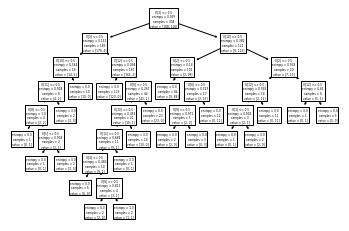

In [0]:
from sklearn import tree

tree.plot_tree(treeClassfier)